# Project: No-show Medical Appointments
> The aim of the project is to find the meaningful insights of the crucial factors that have strong impact on the patient's decisions on whether to present or absent for their medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>

<a id='intro'></a>
## Introduction
> The dataset no_show_appointments_2016 includes information from 110 527 medical appointments in Brazil in 2016 with 14 associated variables (characteristics). With these characteristics, we can generate useful insights to predict if a patient will show up for their scheduled appointment, and also to understand the common reasons why the patients decided to not show up.
>
The followings are the details of 14 variables in the dataset [No-show Appointments](https://www.kaggle.com/joniarroba/noshowappointments):

01 - PatientID: Identification of a patient

02 - AppointmentID: Identification of each appointment

03 - Gender: Male or Female

04 - ScheduledDay: The day the patient called or registered the appointment (happens before the appointment)

05 - AppointmentDay: The day of the actual appointment, when the patient has to visit the doctor

06 - Age: How old the patent is

07 - Neighbourhood: The location of the hospital

08 - Scholarship: True or False. Indicating whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)

09 - Hipertension: True or False. Indicating whether or not the patient has high blood pressure [Hypertension](https://www.cdc.gov/bloodpressure/about.htm#:~:text=High%20blood%20pressure%2C%20also%20called,blood%20pressure%20(or%20hypertension))

10 - Diabetes: True or False. Indicating whether or not the patient has high blood sugar/glucose [Diabetes](https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes#:~:text=Diabetes%20is%20a%20disease%20that,to%20be%20used%20for%20energy.)

11 - Alcoholism: True or False. Indicating whther or not the patient has the addiction to alcohol [Alcoholism](https://en.wikipedia.org/wiki/Alcoholism)

12 - Handcap: True or False. Indicating whether or not the patient is handicap

13 - SMS_received: 1 or more messages sent to the patient

14 - No-show: Yes or No. 'Yes' if the patient did NOT show up. 'No' if the patient showed up for the appointment


### To generate meaniful insights into the dataset, I will apply my data analysis skills and knowledge that I have learned so far to find answers for these following questions:
- **Q1:** Which gender (M/F) accounts for more absent appointments?
- **Q2:** How long in average does it take between the ScheduledDay and AppointmentDay? Does the length of the waiting period affect the patient's decisions of being absent for their medical appointments?
- **Q3:** Which age range has the highest percentage for absent appointments?
- **Q4:** How does the distribution of absent appointments in different neighbourhood look like? Which are the top 3 neighbourhood with absent appointments?
- **Q5:** How do other factors (scholarship, hypertension, diabetes, alcoholism, handicap) affect to the present/absent rate of the patients?
- **Q6:** Would sending SMS messages to the patients influence the present/absent rate of the patients?

In [1]:
# Import all the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>

## Data Wrangling

> In this section, I will check for the cleanliness of the data, then trim and clean the dataset to make it ready for the analysis.

In [2]:
# Load the data
df = pd.read_csv('no_show_appointments_2016.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Note:** *ScheduleDay* has specific time provided while *AppointmentDay* has none (only 00:00:00). It would be good to take off the time part since it's not necessary information.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.shape

(110527, 14)

> **Note:** There are in total 110 527 rows and 14 columns in the dataset

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
# Check if there're null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> **Note:** There is no null values in the dataset.

In [9]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> **Note:** There are **62 299** patients with **110 527** Appointment IDs, which means that there are patients who have more than one appointment. The patients called to schedule the appointments on **103 549** days, but the number of actual days when the appointments happens is only in **27** unique days. The appointments are arranged in **81** different neighbourhoods.

In [10]:
# Check for duplicate rows
df.duplicated().sum()

0

> **Note:** The dataset has no duplicate rows.

In [11]:
# Explore the Age range of the patients
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

> **Note:** The average age of **110 527** patients in the dataset is **37** years-old. The oldest age is **115** years-old, while the youngest age is **minus one (-1)**, which is propably incorrect. The issue with min age will need to be fixed.

In [12]:
# Explore the AppointmentDay of the patients
df['AppointmentDay'].describe()

count                   110527
unique                      27
top       2016-06-06T00:00:00Z
freq                      4692
Name: AppointmentDay, dtype: object

> **Note:** Since *AppointmentDay* column is **object** (string), therefore, describe() function cannot provide figure on the date range of the appointments (min and max).

In [13]:
# Using min() and max() instead of describe() to explore the AppointmentDay column
df['AppointmentDay'].min()

'2016-04-29T00:00:00Z'

In [14]:
df['AppointmentDay'].max()

'2016-06-08T00:00:00Z'

> **Note:** In **27** unique days, the *earliest day of actual appointment* in this dataset is on **2016-04-29** and *the lastest day* is on **2016-06-08**. As we can see, all **110 527** appointments are happened within the duration of **40** days.

In [15]:
# Explore the ScheduledDay column
df['ScheduledDay'].min()

'2015-11-10T07:13:56Z'

In [16]:
df['ScheduledDay'].max()

'2016-06-08T20:07:23Z'

> **Note:** The period when the patients *called to schedule* their appointments is from **2015-11-10** to **2016-06-08**, which is in total within **211** days.

In [17]:
# Function used to explore different factors:
def explore (column):
    return df[column].value_counts()

In [18]:
#  Explore Gender column
explore('Gender')

F    71840
M    38687
Name: Gender, dtype: int64

 > **Note:** Gender can be treated as category type.

In [19]:
# Explore Age column
explore('Age')

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

> **Note:** The **-1** age must be a mistake. It will need to be dropped out from the dataset.

In [20]:
# Explore Neighbourhood column
explore('Neighbourhood')

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

> **Note:** There are **81** neighbourhoods in the dataset. This column can be treated as **category** type instead of object (string).

In [21]:
# Explore Scholarship
explore('Scholarship')

0    99666
1    10861
Name: Scholarship, dtype: int64

> **Note:** Convert Scholarship **int** type to **bool** type.

In [22]:
# Explore Hipertension
explore('Hipertension')

0    88726
1    21801
Name: Hipertension, dtype: int64

> **Note:** Fix typo *Hipertension* to * *Hypertension*. Convert **int** to **bool**.

In [24]:
# Explore Diabetes
explore('Diabetes')

0    102584
1      7943
Name: Diabetes, dtype: int64

> **Note:** Convert **int** to **bool**

In [23]:
# Explore Alcoholism
explore('Alcoholism')

0    107167
1      3360
Name: Alcoholism, dtype: int64

> **Note:** Convert **int** to **bool**

In [25]:
# Explore Handcap
explore('Handcap')

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

> **Note:** 5 different groups for *Hancap* column. There is only a minority of patients are in group *2,3,4*, so these three groups can be combined into the same group of group 1 (for **handicapped** patients).*0* indicates patients WITHOUT handicap. Then convert **int** to **bool**, and fix typo *Handcap* to *Handicap*. 
>
> **Note:** There is only a minority of patients are in group *2,3,4* so it should not affect the result of the analysis when combining them into group *1*.

In [26]:
# Explore SMS_received
explore('SMS_received')

0    75045
1    35482
Name: SMS_received, dtype: int64

> **Note:** Convert **int** to **bool**. Change *SMS_received* to *SMSReceived* for more consistency between column's names.

In [27]:
# Explore No-show
explore('No-show')

No     88208
Yes    22319
Name: No-show, dtype: int64

> **Note**: Convert No-show from **object** type to **bool** for more consistency (convert from object --> int --> bool). Change *No-show* to *NoShow* for more consistency in column's name.

#### Summary of initial observation:
- The dataset has **110 527** rows and **14** columns.
- There are **no missing values** in the dataset.
- There are **no duplicate values** in the dataset
- There are **62 299** patients with **110 527** appointments in total.
- The period when the patients called to schedule their appointments is from **2015-11-10** to **2016-06-08** (within **211-day** period).
- The period when the actual appointments happened is from **2016-04-29** to **2016-06-08** (within **40-day** period). Within this 40-day period, there are **27 unique days** when the patients suppose to come to the appointments.
- The average age of the patients is **37**. The oldest age is **115**, while the youngest age is **-1**, which is probably in correct --> *The issue with min age will need to be fixed*.
- There are **81** neighbourhoods in the dataset. JARDIM CAMBURI has highest number of appointments, while PARQUE INDUSTRIAL has the lowest figure.

### Cleaning Data

#### Things need to be cleaned/fixed:
- Fix typos and style in column's names for more consistency:
    - **PatientId** column: 'PatientId' to 'PatientID'
    - **Hipertension** column: 'Hipertension' to 'Hypertension'
    - **Handcap** column: 'Handcap' to 'Handicap'
    - **SMS_received** column: 'SMS_received' to 'SMSReceived'
    - **No-show** column: 'No-show' to 'NoShow'
    
- Fix data types:
    - **PatientID**: float -> int
    - **ScheduledDay** and **AppointmentDay**: object -> datetime
    - **Scholarship**, **Hypertension**, **Diabetes**, **Alcoholism**, and **SMSReceived**: int -> bool
    - **Hancap**: combine group 2,3,4 to group 1. Then int -> bool
    - **NoShow**: object -> int -> bool (True: absent/no shown-up patients, False: present/shown-up patients)
    - **Gender**, **Neighbourhood**: object -> category
    

In [28]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [29]:
# Renaming columns for more consistency
df.rename(columns={'PatientId':'PatientID', 'Hipertension':'Hypertension', 'Handcap':'Handicap',
                   'SMS_received':'SMSReceived', 'No-show':'NoShow'},inplace=True)

In [30]:
# Confirming changes in column's names were made
df.head(5)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientID       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMSReceived     110527 non-null  int64  
 13  NoShow          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [32]:
# PatientID: float -> int
df['PatientID'] = df['PatientID'].astype(int)

In [33]:
# ScheduledDay and AppointmentDay: object -> datetime
for c in ['ScheduledDay','AppointmentDay']:
    df[c] = pd.to_datetime(df[c])

In [34]:
# Scholarship, Hypertension, Diabetes, Alcoholism, and SMSReceived: int -> bool
for c in ['Scholarship','Hypertension', 'Diabetes', 'Alcoholism', 'SMSReceived']:
    df[c] = df[c].astype(bool)

In [35]:
# Handicap: combine group 2, 3, 4 to group 1
df.loc[df['Handicap'] > 1, 'Handicap'] = 1

In [36]:
# Check to make sure Handicap column contains only two values 0 or 1
df['Handicap'].value_counts()

0    108286
1      2241
Name: Handicap, dtype: int64

In [37]:
# Convert Handicap int --> bool
df['Handicap'] = df['Handicap'].astype(bool)

In [38]:
# NoShow: object -> int -> bool 

# First, convert NoShow from object -> int by replacing No ->0, Yes -> 1
df['NoShow'].replace({'No':0, 'Yes':1}, inplace=True)

# Then convert NoShow int -> bool
df['NoShow'] = df['NoShow'].astype(bool)

In [39]:
# Gender, Neighbourhood: object -> category
for c in ['Gender', 'Neighbourhood']:
    df[c] = df[c].astype('category')

In [40]:
# Confirm changes in data types were made
df.dtypes

PatientID                       int64
AppointmentID                   int64
Gender                       category
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                category
Scholarship                      bool
Hypertension                     bool
Diabetes                         bool
Alcoholism                       bool
Handicap                         bool
SMSReceived                      bool
NoShow                           bool
dtype: object

In [41]:
df.head(5)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,False
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,False
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,False
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,False


> **Note:** In my opinion, *AppointmentId* doesn't bring any extra benefits/ insights to the analysis, so it can be dropped out from the dataset.

In [42]:
# Dropping AppointmentID column:
df.drop(['AppointmentID'], axis=1, inplace=True)

In [43]:
# Confirm the change was made
df.head(5)

,PatientID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,False
1,558997776694438,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,False
2,4262962299951,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,False
3,867951213174,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False
4,8841186448183,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,False


> **Note:** Since the AppointmentID columns was just dropped out, it's important to check if there's any duplicate values in the updated dataset.

In [44]:
# Check for duplicates
df.duplicated().sum()

618

> **Note:** As we can see, there is **618 duplicates** after dropping the *AppointmentID* columns. However, the reason for these duplicates could be that there are patients called to book different appointments at the same time and having different medical appointments at the same appointment day. Because of this, I will keep the duplicates in my analysis and these duplicates will be seen as seperate appointments.

<a id='eda'></a>

## Exploratory Data Analysis

 Let's start our exploration by finding answers for these following questions:
- **Q1:** Which gender (M/F) accounts for more absent appointments?
- **Q2:** How long in average does it take between the ScheduledDay and AppointmentDay? Does the length of the waiting period affect to the decision of the patients who decided to not show up for their appointments?
- **Q3:** Which age range has the highest percentage for no show-up appointments?
- **Q4:** How does the distribution of no show-up appointments in different neighbourhood look like? Which are the top 3 neighbourhood with no show-up appointments?
- **Q5:** How do other factors (scholarship, hypertension, diabetes, alcoholism, handicap) affect to the shown-up/no shown-up rate of the patients?
- **Q6:** Would sending SMS messages to the patients affect to the shown-up/no shown-up rate of the patients?

### Functions used in this part

In [45]:
# Function to plot pie chart
def pie (a, label, color=['LightPink','LightBlue'], explode=[0,0.1]):
    """This function is used to plot a pie chart.
    """
    return plt.pie(a,
                  labels=label,
                  colors=color,
                  explode=explode,
                  shadow=True,
                  autopct='%.2f%%',
                  radius=1)

In [46]:
# Function to unstack column (calculate % of present/absent patients With/ Without a certain factor)
def unstack (a, b):
    """This function is used to unstack column and 
    calculate % of present/absent patients With/ Without X factor.
    X factor = e.g. Scholarship, Diabetes, etc.
    """
    return df.groupby(a)[b].value_counts(normalize=True).mul(100).round(2).unstack(a)

In [47]:
# Function to draw bar chart "Percentage of Present/ Absent Appointments by a certain factor 
def bar (pct_x):
    """This function is used to draw bar chart "Percentage of Present/ Absent Appointments by X factor.
    X factor = e.g. Scholarship, Diabetes, etc.
    """
    chart_x = pct_x.plot.bar(edgecolor='black', figsize=[14,8], rot=0, width=0.9, color=['Lightblue','Lightpink'])
    return chart_x

In [48]:
# Function to set title to the bar chart
def bar_title (fig_x, factor_name):
    """This function is used to set title for the bar chart created by the above bar() function.
    """
    return fig_x.set_title('Percentage of Present/Absent Appointments by '+ factor_name, fontsize=14)

In [49]:
# I will first check how many patients are absent/present for their medical appointments in the dataset
show_noshow = explore('NoShow')
show_noshow

False    88208
True     22319
Name: NoShow, dtype: int64

In [50]:
pct_show_noshow = df['NoShow'].value_counts(normalize=True).mul(100).round(2)
pct_show_noshow

False    79.81
True     20.19
Name: NoShow, dtype: float64

In [51]:
# Dateframe for ABSENT patients
df_noshow = df[df['NoShow']==True]

In [52]:
# Dataframe for PRESENT patients
df_show = df[df['NoShow']==False]

### Fig.01: Percentage of Present and Absent Patients for Their Medical Appointments

In [52]:
# Another way to plot pie chart
#fig_01 = show_noshow.plot(kind='pie', labels= ['Present', 'Absent'],
#                          colors= ['Lightblue', 'Lightpink'],explode=[0.1,0],
#                          autopct='%1.2f%%', shadow=True, radius=1)
#fig_01.set_title('Percentage of Present and Absent Patients for Their Medical Appointments', fontsize=14');

In [53]:
# Function to set title for the pie chart (mostly used for the analysis of Q5)
def pie_title (a):
    """This function is used to set title for the pie created by the above pie() function.
    Mostly used for the analysis of Q5
    """
    return plt.title('Percentage of Patients WITH and WITHOUT '+a, fontsize=14)

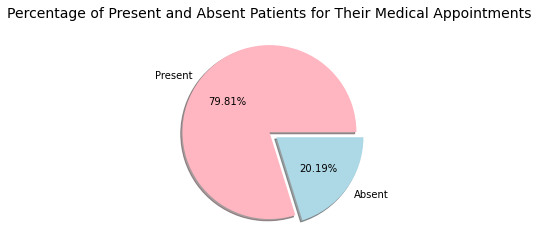

In [54]:
fig_01 = pie(show_noshow, ['Present','Absent'])
plt.title('Percentage of Present and Absent Patients for Their Medical Appointments', fontsize=14);

> **Note:** About **1/4** of the total number of patients are *absent* for their medical appointments (**20.19%**), while the majority of patients (**79.81%**) are *present* for their appointments.

### Q1: Which gender (M/F) accounts for more *absent* appointments?

In [55]:
gender = explore('Gender')
gender

F    71840
M    38687
Name: Gender, dtype: int64

### Fig.02: Number of Medical Appointments by Gender

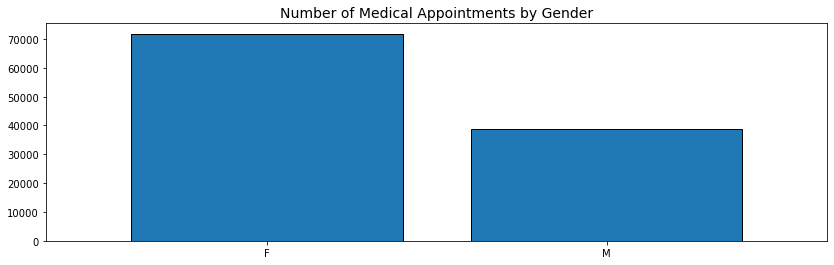

In [56]:
fig_02 = gender.plot.bar(edgecolor='black', figsize=[14,4], rot=0, width=0.8)
fig_02.set_title('Number of Medical Appointments by Gender', fontsize=14);

### Fig.03: Percentage of Medical Appointments by Gender

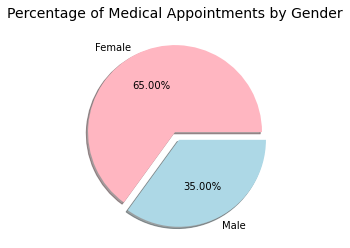

In [57]:
# Draw the chart
fig_03 = pie(gender,['Female', 'Male'])
plt.title('Percentage of Medical Appointments by Gender', fontsize=14);

> As we can see *Female* has almost double the number of appointments (**65.00%**) compared to *Male* (**35.00%**).

In [58]:
# Number of ABSENT appointments per gender
noshow_gender = df[df['NoShow']==True]['Gender'].value_counts()
noshow_gender


F    14594
M     7725
Name: Gender, dtype: int64

### Fig.04: Percentage of Absent Appointments by Gender

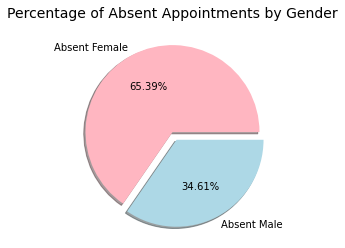

In [59]:
fig_04 = pie(noshow_gender,['Absent Female', 'Absent Male'])
plt.title('Percentage of Absent Appointments by Gender', fontsize=14);


> The percentage of *Absent* appointments belongs to *Female* patients (**65.39%**) is almost double that of *Male* patients. However, we also need to keep in mind that *Female* has **almost double** the total amount of appointments booked (**71,840** appointments) compared to *Male* (**38,687** appointments). Since *Female* has more booked appointments than *Male*, therefore, that could be one reason why the number of *absent appointments* generated by *Female* is higher than that of *Male* patients.

In [60]:
# Percentage of present/absent appointments by Gender
pct_gender = unstack('Gender', 'NoShow')
pct_gender

Gender,F,M
NoShow,,
False,79.69,80.03
True,20.31,19.97


### Fig.05: Percentage of Present/ Absent Appointments by Gender 

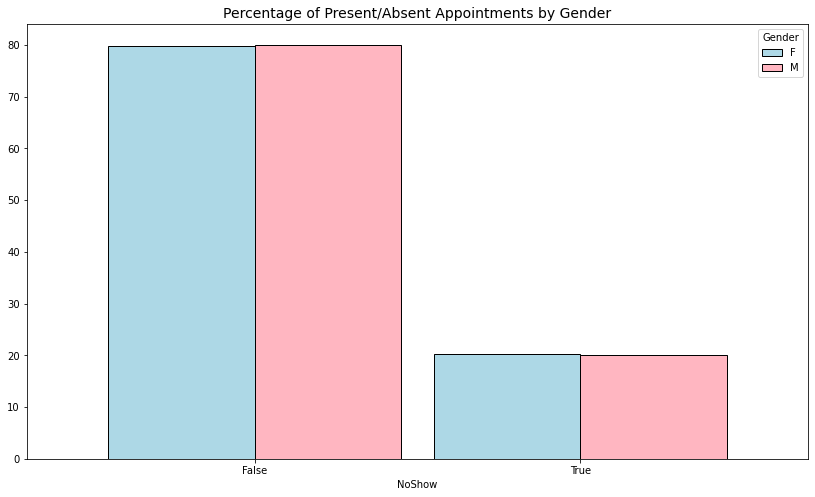

In [61]:
# Draw the chart
fig_05 = bar(pct_gender)
bar_title(fig_05,'Gender');    

> As we can see from *fig.05*, the percentage of *Absent Female* out of the total number of *Female* patients is about **the same** with that of *Male* patients, **20.31%** and **19.97%** respectively. 

> **Q1: Which gender (M/F) accounts for more *absent* appointments?**
>
> In general, **65.39%** of the *absent* appointments belongs to *Female* patients, while **35.61%** is of *Male* patients. However, *Female* has **almost double** the total amount of appointments booked (**71,840** appointments) compared to *Male* (**38,687** appointments). Since Female has more booked appointments than Male in general, therefore, that could be one reason why the numbers of absent appointments generated by Female is higher than that of Male patients. If we only consider the *absent* rate out of the total number of appointments each gender, then *Female* and *Male* have about **the same** *absent* rate, **20.31%** and **19.97%** respectively.

### Q2: How long in average does it take between the ScheduledDay and AppointmentDay? Does the length of the waiting period affect to the decision of the patients who decided to not show up for their appointments?

In [62]:
# Calculate the number of days between ScheduledDay and AppointmentDay
date_diff = df['AppointmentDay'] - df['ScheduledDay']
date_diff = pd.to_timedelta(date_diff,'D')
date_diff.describe()

count                        110527
mean      9 days 17:08:34.161960425
std      15 days 05:51:27.891504122
min               -7 days +10:10:40
25%        -1 days +15:41:31.500000
50%                 3 days 11:22:18
75%         14 days 07:41:34.500000
max               178 days 13:19:01
dtype: object

> **Note:** The **average** waiting day between the ScheduledDay and AppointmentDay is **9** days. The minimum waiting day is **-7** days (*there might be some mistakes --> need to be checked*), and the maximum waiting day is **178** days.

In [63]:
# Extract only the number of days from date_diff
date_diff = round(date_diff/np.timedelta64(1, 'D')).astype(int)

In [64]:
# Add new column DateDiff to our dataframe
df['DateDiff'] = date_diff

In [65]:
# Check if the new column DateDiff was added
df.head()

,PatientID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DateDiff
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,False,-1
1,558997776694438,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,False,-1
2,4262962299951,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,False,-1
3,867951213174,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False,-1
4,8841186448183,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,False,-1


In [66]:
df['DateDiff'].describe()

count    110527.000000
mean          9.803297
std          15.238508
min          -7.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         179.000000
Name: DateDiff, dtype: float64

> **Note:** As we can see, there's **minus date difference** in the calculation between the *ScheduledDay* and *AppointmentDay*. In reality, it is *impossible* for the minus figures to happen because the AppoinmentDay is always after/ or at the same date as the ScheduledDay, therefore, the DateDiff cannot be minus. For this reason, all the minus DateDiff figures will need to bechanged to 0 since there must be errors in the data.
>
>The reason causing the minus figures (*especially the DateDiff = -1 cases*) is because the ScheduledDay in the data including the time (e.g. 16:19:04+00:00), while the AppointmentDay does not (e.g. 00:00:00+00:00). That's why when the *AppoinmentDay* happens at the same date as the *ScheduledDay*, it results in the DateDiff = -1.

In [67]:
len(df.query('DateDiff < 0'))

12161

> **Note:** There are in total **12,161** appointments that have *minus* DateDiff.

In [68]:
len(df.query('DateDiff == 1'))

5290

> **Note:** There are **12,158** appointments that have *-1* DateDiff. These appointment must have the *AppoimentDay* happens in the same date as the *ScheduledDay*.

In [69]:
len(df.query('DateDiff < -1'))

3

> **Note:** There are **3** appointments that have *more than -1* DateDiff. These must be errors in the data since it is not possible for the **actual** *AppointmentDay* to be happenned before it can be scheduled in the *ScheduledDate*.

In [70]:
# Fix all the minus DateDiff figures to 0
df['DateDiff'] = df['DateDiff'].clip(lower=0)

In [71]:
# Check if all minus DateDiff were changed to 0
len(df.query('DateDiff < 0'))

0

In [72]:
df['DateDiff'].describe()

count    110527.000000
mean          9.913397
std          15.163468
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         179.000000
Name: DateDiff, dtype: float64

### Fig.06: Distribution of Waiting Days Between the Scheduled Date and Appoinment Date

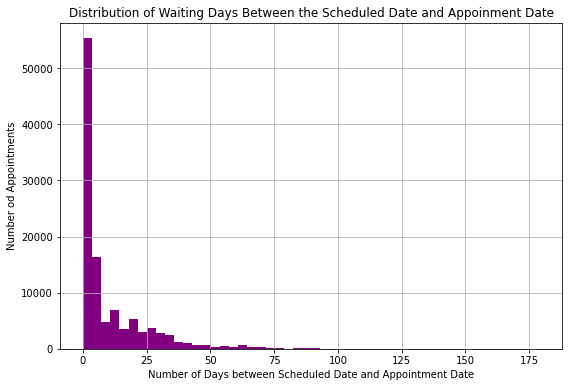

In [73]:
df['DateDiff'].hist(bins=50, color='purple',figsize=(9,6))
plt.xlabel('Number of Days between Scheduled Date and Appointment Date')
plt.ylabel('Number od Appointments')
plt.title('Distribution of Waiting Days Between the Scheduled Date and Appoinment Date')
plt.show()

> From *fig.06*, we can see that the majority of appointments has the ScheduledDay and AppointmentDay at the same date (DateDiff = 0)

##### Next step, I will divide the number of days between the ScheduledDay and AppointmentDay into five different categories:
    - DateDiff = 0 day: SameDay
    - DateDiff = 1-4 days: 1-4Days
    - DateDiff = 5-10 days: 5-10Days
    - DateDiff = 11-15 days : 11-15Days
    - DateDiff > 15 days: >15Days
##### In this way, it would be much easier to see which category will have the highest not shown-up appointment, so that we can draw insight into how the waiting duration can affect the patient's decision on whether to show-up or not show-up for their medical appointments.

In [74]:
# Divide waiting duration into 5 categories and store it in new dataframe
bin_edges = [-0.1, 0.1, 4, 10, 15, 179]
bin_labels = ['SameDay', '1-4Days', '5-10Days', '11-15Days', '>15Days']
df['DurationCategory'] = pd.cut(df['DateDiff'], bin_edges, labels=bin_labels)

In [75]:
# Number of apppointments by Waiting Duration
duration = explore('DurationCategory')
duration

SameDay      40972
>15Days      25801
1-4Days      18974
5-10Days     16597
11-15Days     8183
Name: DurationCategory, dtype: int64

### Fig. 07: Percentage of Appointments by Waiting Duration Category

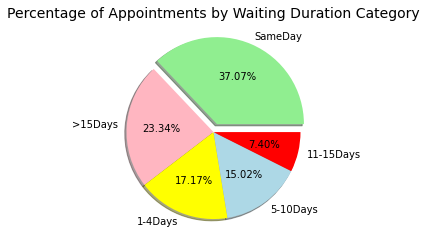

In [76]:
# Draw the chart - Fig.07
fig_07 = pie(duration, ['SameDay','>15Days','1-4Days', '5-10Days', '11-15Days'],
             ['LightGreen','LightPink','Yellow','LightBlue', 'Red'],
             [0.1, 0, 0, 0, 0])
plt.title('Percentage of Appointments by Waiting Duration Category', fontsize=14);

> As we can see from *fig.07*, the number of appointments that were scheduled at the **same day** (SameDay category) accounts for the highest percentage (**37.07%**), while the **11-15 days** of waiting duration accounts for the lowest percentage (**7.40%**).
>
>The second highest percentage (**23.34%**) belongs to the appointments that have the waiting durtion **more than 15 days**. There is not so big gap between the figure of **1-4 days (17.17%)** and **5-10 days (15.02%)** of the waiting duration.

##### Now we already know which Waiting Duration Category has the highest and lowest percentage of appointments. In the next step, I will generate insight into the Shown-up and No Shown-up percentage of each waiting duration category.

### Fig.08: Percentage of Present/Absent Appointments by Waiting Duration

In [77]:
# Percentage of present/absent appointments by Waiting Duration
pct_each_duration = df.groupby('DurationCategory')['NoShow'].value_counts(normalize=True).mul(100).round(2).unstack()
pct_each_duration

NoShow,False,True
DurationCategory,,
SameDay,94.40,5.60
1-4Days,76.40,23.60
5-10Days,72.90,27.10
11-15Days,68.02,31.98
>15Days,67.33,32.67


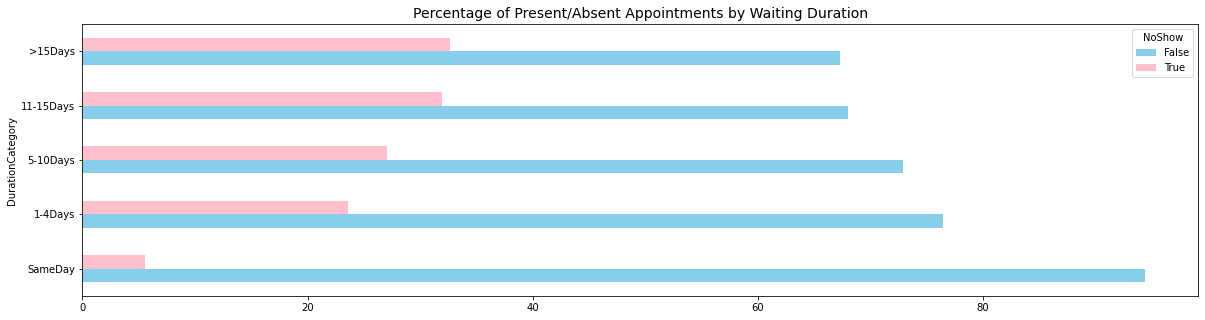

In [78]:
# Draw the chart
fig_08 = pct_each_duration.plot(kind='barh', color=['skyblue','pink'], figsize=(20,5))
fig_08.set_title("Percentage of Present/Absent Appointments by Waiting Duration", fontsize=14)
plt.show()

> **Q2: How long in average does it take between the ScheduledDay and AppointmentDay? Does the length of the waiting period affect to the decision of the patients who decided to not show up for their appointments?**
>
>In average, it takes **9.9** days between the ScheduledDay and AppointmentDay. The longer the waiting duration, the higher the percentage of *absent* appointments (*Fig.08*).

### Q3: Which age range has the highest percentage for no show-up appointments?

#####  Similar to the Waiting Duration, the Age will also be divided into different category to make it easier for the analysis:
- 0-14: Children
- 15-24: Youth
- 25-64: Adults
- 65 and over 65 (>=65): Seniors

The ages were divided into category according to this article [Age Categories, Life Cycle Groupings](https://www.statcan.gc.ca/en/concepts/definitions/age2)


In [79]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [80]:
# Check how many patients have minus age (which must be a mistake since age shouldn't be minus)
len(df.query('Age < 0'))

1

In [81]:
# Drop the -1 age out of the dataframe
df = df[df['Age'] >= 0]

In [82]:
# Check if the -1 disappear
df['Age'].describe() 

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [83]:
# Divide Age into 4 categories and add AgeCategory column to the dataframe
# 0-14: Children, 15-24: Youth, 25-64: Adults, 65 and over 65: Seniors
bin_edges= [-0.1,14,24,64,116]
bin_labels = ['Children','Youth','Adults','Seniors']
df['AgeCategory'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels)

### Fig.09: Percentage of Appoinments By Age Category

In [84]:
# Number of apppointments by Age Category
age = explore('AgeCategory')
age

Adults      58857
Children    23257
Seniors     14402
Youth       14010
Name: AgeCategory, dtype: int64

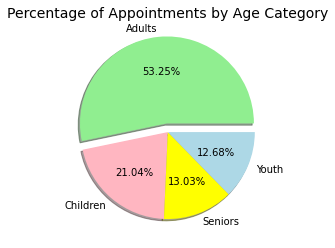

In [85]:
# Draw the chart
fig_09 = pie(age, 
             ['Adults','Children','Seniors','Youth'],
             ['LightGreen','LightPink','Yellow','LightBlue'],
             [0.1, 0, 0, 0])
plt.title('Percentage of Appointments by Age Category', fontsize=14);

> More than half of the total number of appointments are from **Adults** (25-64 years) (**53.25%**). The second highest number of appointments (**21.04%**) are from **Children** patients (0-14 years), followed by **Seniors**(**13.03%**). **Youth** patients (15-24 years) account for the lowest number of appointments (**12.68%**).

### Fig.10: Number of ABSENT Appointments by Age Category

In [86]:
# Number of ABSENT appointments by Age Category
age_noshow = df[df['NoShow']==True]['AgeCategory'].value_counts()
age_noshow

Adults      11620
Children     4926
Youth        3540
Seniors      2233
Name: AgeCategory, dtype: int64

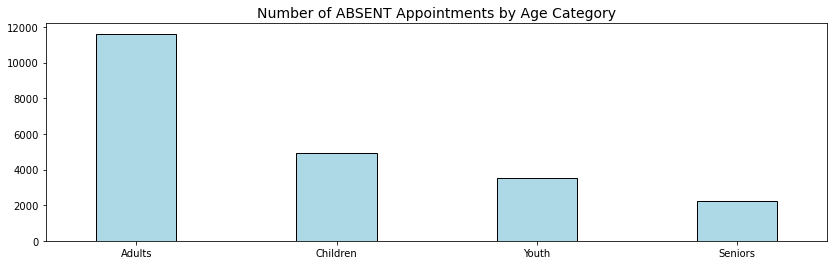

In [87]:
# Draw the chart
fig_10 = age_noshow.plot.bar(edgecolor='black', color= 'Lightblue', figsize=[14,4], rot=0, width=0.4)
fig_10.set_title('Number of ABSENT Appointments by Age Category', fontsize=14);

### Fig.11: Percentage of ABSENT Appointment by Age Category (Out of the Total Number of Absent Appointments)

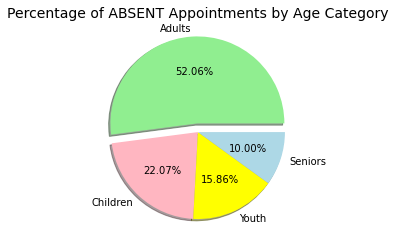

In [88]:
fig_11 = pie(age_noshow,
             ['Adults','Children','Youth','Seniors'],
             ['LightGreen','LightPink','Yellow','LightBlue'],
             [0.1, 0, 0, 0])
plt.title('Percentage of ABSENT Appointments by Age Category', fontsize=14);

> From *fig.09, 10, 11* we can see that **Adults** has the highest total number of booked appoinments. At the same time, **Adults** also has the highest number of absent appointments.

> **Q3: Which age range has the highest percentage for *absent* appointments?**
>
> As we can see, **Adults** has the highest number of appointments booked (**58,857** appointments, accounting for **53.25%** of the total number of appointments), but at the same time **Adults** also has the highest number of *absent* appointments (**11,620** *absent* appointments, accounting for **52.06%** of the total *absent* appointments). **Children** has the sencond highest percentage of absent appointments (**22.07%**), while only **10.00%** of **Seniors** are absent for their appointments.

### Q4: How does the distribution of no show-up appointments in different neighbourhood look like? Which are the top 3 neighbourhood with no show-up appointments?

In [89]:
# How many neigbourhood in the dataframe?
df['Neighbourhood'].nunique()

81

> **Note:** There are **81** neighbourhoods in total.

In [90]:
# Number of appoinment by Neighbourhood (nbh)
nbh = explore('Neighbourhood')
nbh

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

### Fig.12: The Distribution of Appointments by Neighbourhood

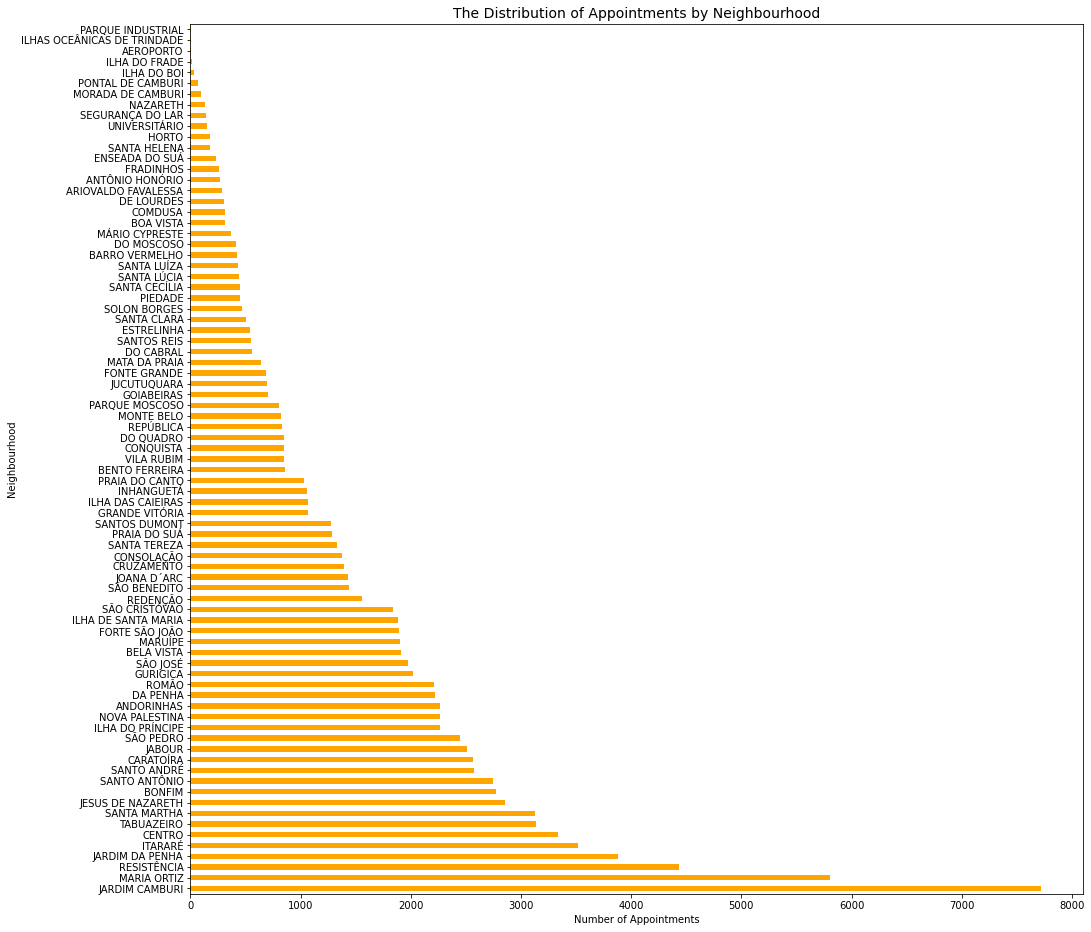

In [91]:
# Draw the chart
fig_12 = nbh.plot(kind='barh', color='Orange', figsize=(16,16))
fig_12.set_xlabel('Number of Appointments')
fig_12.set_ylabel('Neighbourhood')
fig_12.set_title('The Distribution of Appointments by Neighbourhood', fontsize=14);

> Top 3 neigbourhoods that have the highest number of appointments:
> - 1st: JARDIM CAMBURI 
> - 2nd: MARIA ORTIZ
> - 3rd: RESISTÊNCIA

In [92]:
# Number of ABSENT appointments by Neighbourhood
nbh_noshow = df[df['NoShow']==True]['Neighbourhood'].value_counts()
nbh_noshow

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
ILHA DO BOI                       3
ILHA DO FRADE                     2
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         1
PARQUE INDUSTRIAL                 0
Name: Neighbourhood, Length: 81, dtype: int64

### Fig.13: The Distribution of Absent Appointments by Neighbourhood

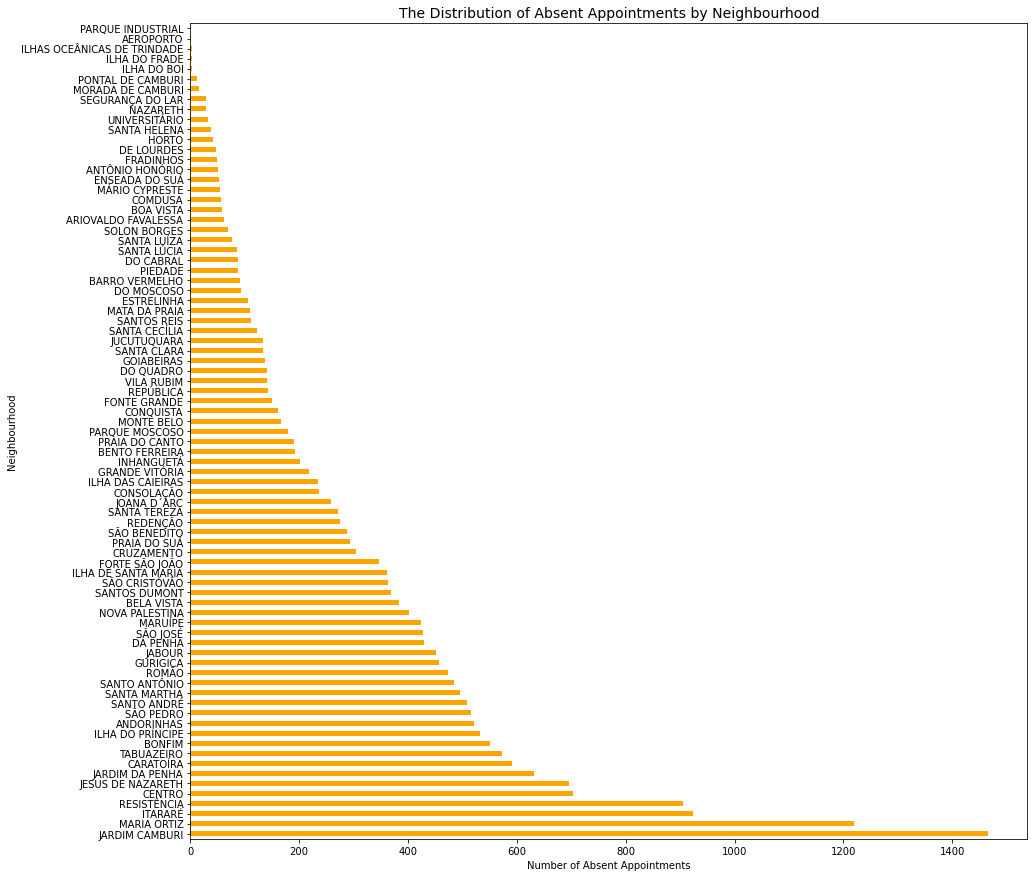

In [93]:
fig_13 = nbh_noshow.plot(kind='barh', color='Orange', figsize=(15,15))
fig_13.set_xlabel('Number of Absent Appointments')
fig_13.set_ylabel('Neighbourhood')
fig_13.set_title('The Distribution of Absent Appointments by Neighbourhood', fontsize=14);

> Top 3 neighbourhoods that have the highest number of **Absent** Appointments:
> - 1st: JARDIM CAMBURI
> - 2nd: MARIA ORTIZ
> - 3rd: ITARARÉ
>
> As we can see, JARDIM CAMBURI and MARIA ORTIZ are the 2 neighbourhood that have the highest number of appointments. At the same time, these 2 neighbourhood also have the highest figure of absent appointments.

In [94]:
# Percentage of Absent appointment per nbh out of the total number of appointments each nbh has
pct_nbh_noshow = (nbh_noshow/nbh).mul(100).round(2)
pct_nbh_noshow

AEROPORTO              12.50
ANDORINHAS             23.03
ANTÔNIO HONÓRIO        18.45
ARIOVALDO FAVALESSA    21.99
BARRO VERMELHO         21.51
                       ...  
SÃO JOSÉ               21.65
SÃO PEDRO              21.04
TABUAZEIRO             18.30
UNIVERSITÁRIO          21.05
VILA RUBIM             16.57
Name: Neighbourhood, Length: 81, dtype: float64

### Fig.14: Percentage of Absent Appointments Per Neighbourhood

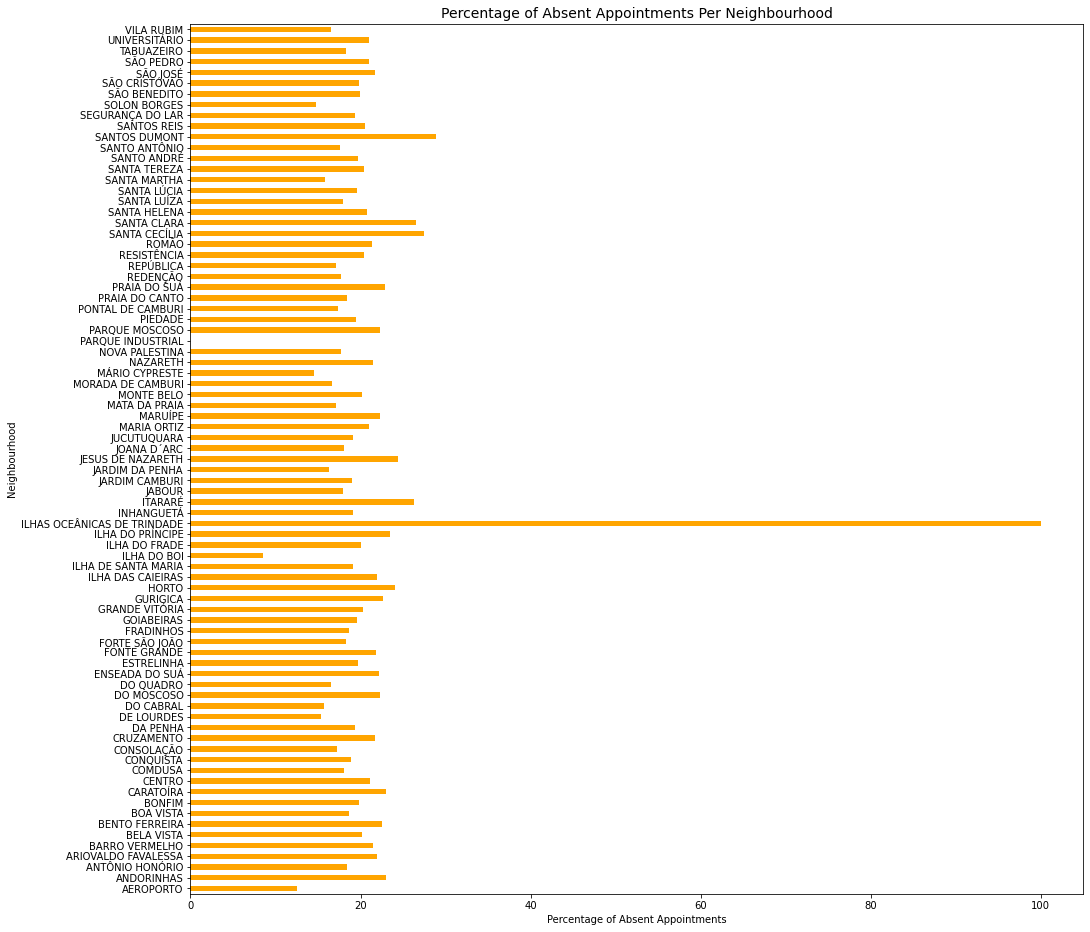

In [95]:
fig_14= pct_nbh_noshow.plot(kind='barh', color='orange', figsize=(16,16))
fig_14.set_xlabel('Percentage of Absent Appointments')
fig_14.set_ylabel('Neighbourhood')
fig_14.set_title('Percentage of Absent Appointments Per Neighbourhood', fontsize=14);

In [96]:
# Total number of appointments in ILHAS OCEÂNICAS DE TRINDADE
df[df['Neighbourhood']=='ILHAS OCEÂNICAS DE TRINDADE']['Neighbourhood'].count()

2

In [97]:
# Total number of ABSENT Appointments in ILHAS OCEÂNICAS DE TRINDADE
nbh_noshow['ILHAS OCEÂNICAS DE TRINDADE']

2

> *Fig.14* shows the percentage of *absent appointments* compared to the *total appointments each neighbourhood* has. For example, as we can see the neighbourhood *ILHAS OCEÂNICAS DE TRINDADE* has the percentage of *absent* appointments as **100%**, it is because the total number of appointments in this neighbourhood is **2** appointments, and the patients didn't show up for both of these 2 appointments, which results in the figure of **100%** as the percentage of *absent* appointment for this neighbourhood.

### Q5: How do other factors (scholarship, hypertension, diabetes, alcoholism, handicap) affect to the shown-up/no shown-up rate of the patients?

### *Scholarship: True or False. Indicating whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)*

In [98]:
# The number of patients With and Without Scholarship
scholarship = explore('Scholarship')
scholarship

False    99665
True     10861
Name: Scholarship, dtype: int64

### Fig.15: Percentage of Patients WITH and WITHOUT Scholarship

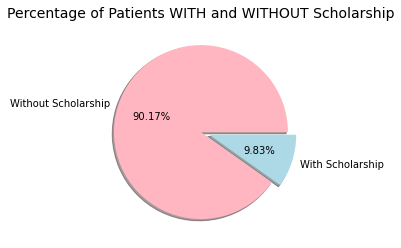

In [99]:
# Draw the chart
fig_15 = pie(scholarship, ['Without Scholarship', 'With Scholarship'])
pie_title('Scholarship');

> As we can see from *Fig.15*, the majority of patients are WITHOUT scholarship, accounts for **90.17%**, while there is only **9.83%** of the total number of patients are WITH scholarship.

In [100]:
# Percentage of present/absent appointments With/Without Scholarship
pct_scholarship = unstack('Scholarship', 'NoShow')
pct_scholarship

Scholarship,False,True
NoShow,,
False,80.19,76.26
True,19.81,23.74


### Fig.16: Percentage of Present/ Absent Appoinments by Scholarship

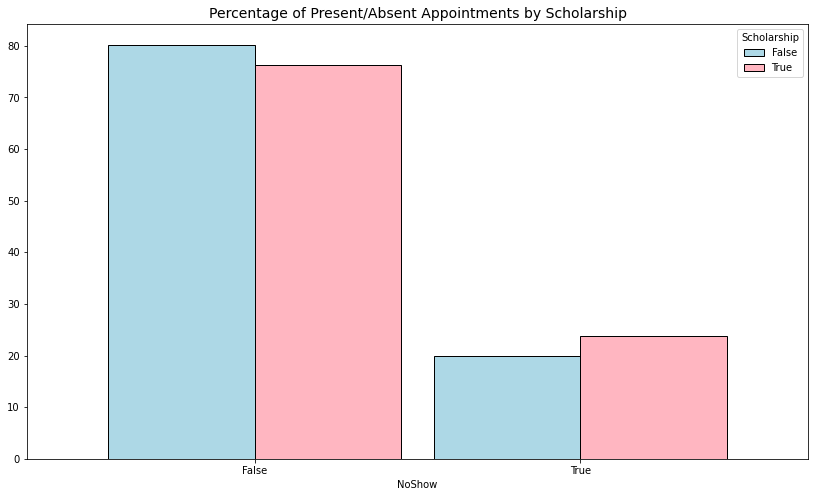

In [101]:
# Draw the chart
fig_16 = bar(pct_scholarship)
bar_title(fig_16, 'Scholarship');   

> As we can see from *Fig.16*, the patients who *enrolled* in Brasilian welfare program are **more likely** to be *absent* for their medical appointments (**23.74%**) than the one who are NOT enrolled in the program (**19.81%**). 

### *Hypertension: True or False. Indicating whether or not the patient has high blood pressure*

### Fig.17: Percentage of Patients WITH and WITHOUT Hypertension 

In [102]:
# Number of patients With and Without Hypertension
hyper = explore('Hypertension')
hyper

False    88725
True     21801
Name: Hypertension, dtype: int64

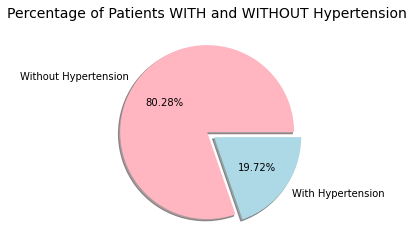

In [103]:
# Draw the chart 
fig_17 = pie(hyper,['Without Hypertension', 'With Hypertension'])
pie_title('Hypertension');

> As we can see from the pie chart, the majority of patients doesn't have hypertension (**80.28%**), while only **19.72%** of the total number of patients have hypertension.

In [104]:
# Percentage of present/absent appointments With/Without Hypertension
pct_hyper = unstack('Hypertension', 'NoShow')
pct_hyper

Hypertension,False,True
NoShow,,
False,79.1,82.7
True,20.9,17.3


### Fig.18: Percentage of Present/ Absent Appoinments by Hypertension

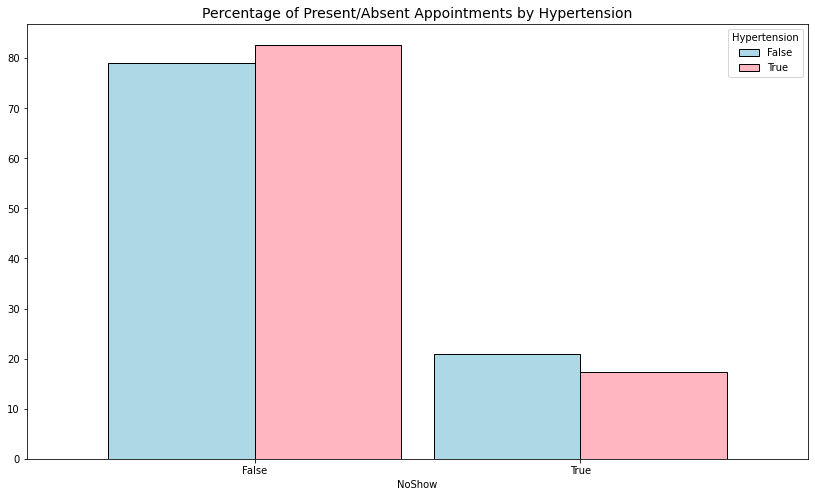

In [105]:
# Draw the chart
fig_18 = bar(pct_hyper)
bar_title(fig_18, 'Hypertension');

> From *Fig.18*, we can see that the percentage of *absent* patients WITHOUT Hypertension (**20.90%**) is higher than that of WITH Hypertension (**17.30%**). Therefore, it can be said that the patients WITHOUT hypertension is *more likely to be absent* for their medical appointments than the patients WITH hypertension.

### *Diabetes: True or False. Indicating whether or not the patient has high blood sugar/glucose*

In [106]:
# Number of patients With and Without Diabetes
diabetes = explore('Diabetes')
diabetes

False    102583
True       7943
Name: Diabetes, dtype: int64

### Fig.19: Percentage of Patients WITH and WITHOUT Diabetes 

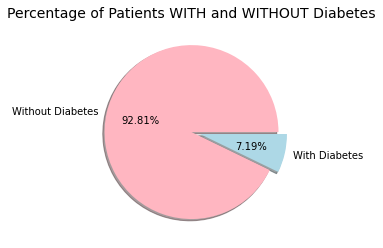

In [107]:
# Draw the chart
fig_19 = pie(diabetes, ['Without Diabetes', 'With Diabetes'])
pie_title('Diabetes');

> The majority (**92.81%**) of the patients is WITHOUT diabetes, while only **7.19%** of the patients has diabetes.

In [108]:
# Percentage of present/absent appointments With/Without Diabetes
pct_diabetes = unstack('Diabetes', 'NoShow')
pct_diabetes

Diabetes,False,True
NoShow,,
False,79.64,82.0
True,20.36,18.0


### Fig.20: Percentage of Present/ Absent Appoinments by Diabetes

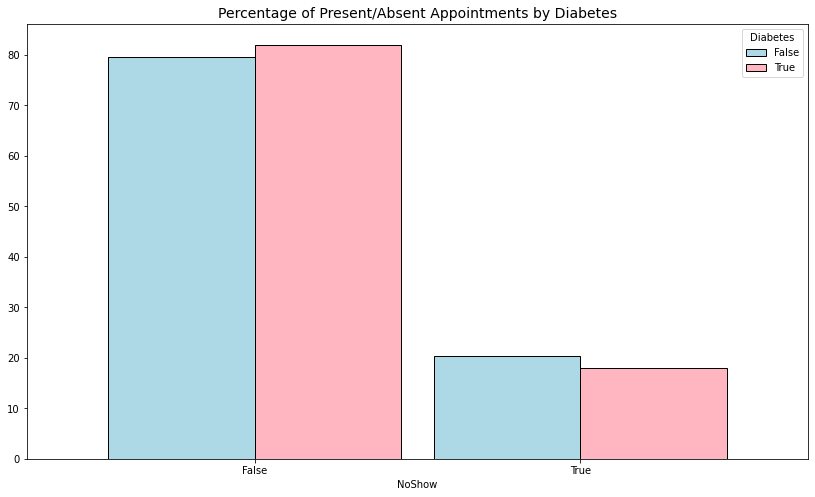

In [109]:
# Draw the chart
fig_20 = bar(pct_diabetes)
bar_title(fig_20,'Diabetes');

> The patients WITHOUT diabetes (**20.36%**) are more likely to be *absent* for their medical appointments than the ones WITH diabetes (**18.00%**).

### *Alcoholism: True or False. Indicating whther or not the patient has the addiction to alcohol*

In [110]:
# Number of patients With and Without Alcoholism
alcohol = explore('Alcoholism')
alcohol

False    107166
True       3360
Name: Alcoholism, dtype: int64

### Fig.21: Percentage of Patients WITH and WITHOUT Alcoholism

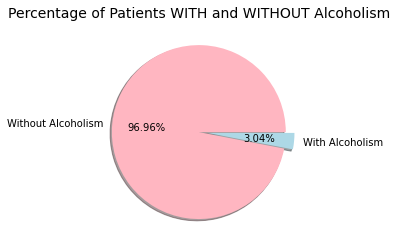

In [111]:
# Draw the chart
fig_21 = pie(alcohol, ['Without Alcoholism', 'With Alcoholism'])
pie_title('Alcoholism');

> The majority of patients (**96.96%**) is WITHOUT alcoholism, while only **3.04%** of patients is addicted to alcohol.

In [112]:
# Percentage of present/absent appointments With/Without Alcoholism
pct_alcohol = unstack('Alcoholism', 'NoShow')
pct_alcohol

Alcoholism,False,True
NoShow,,
False,79.81,79.85
True,20.19,20.15


### Fig.22: Percentage of Present/ Absent Appoinments by Alcoholism

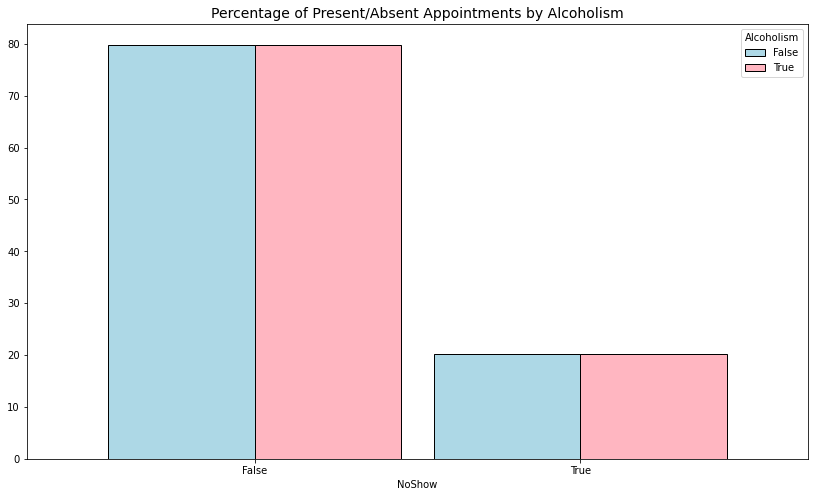

In [113]:
# Draw the chart
fig_22 = bar(pct_alcohol)
bar_title(fig_22,'Alcoholism');

> The percentage of *absent* patients WITH and WITHOUT alcoholism are about the same, **20.15%** and **20.19%** respectively. Therefore, it can be said that Alcoholism does not affect to the absent rate of the patients.

### *Handicap: True or False. Indicating whether or not the patient is handicap*

In [114]:
# Number of patients With and Without Handicap
handicap = explore('Handicap')
handicap

False    108285
True       2241
Name: Handicap, dtype: int64

### Fig.23: Percentage of Patients WITH and WITHOUT Handicap

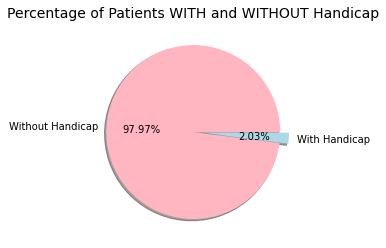

In [115]:
# Draw the chart
fig_23 = pie(handicap,['Without Handicap', 'With Handicap'])
pie_title('Handicap');

> There is only a minority of patients are handicapped (**2.03%**). The rest of the patients are NOT handicapped (**97.97%**).

In [116]:
# Percentage of present/absent appointments With/Without Handicap
pct_handicap = unstack('Handicap', 'NoShow')
pct_handicap

Handicap,False,True
NoShow,,
False,79.76,81.84
True,20.24,18.16


### Fig.24: Percentage of Present/ Absent Appoinments by Handicap

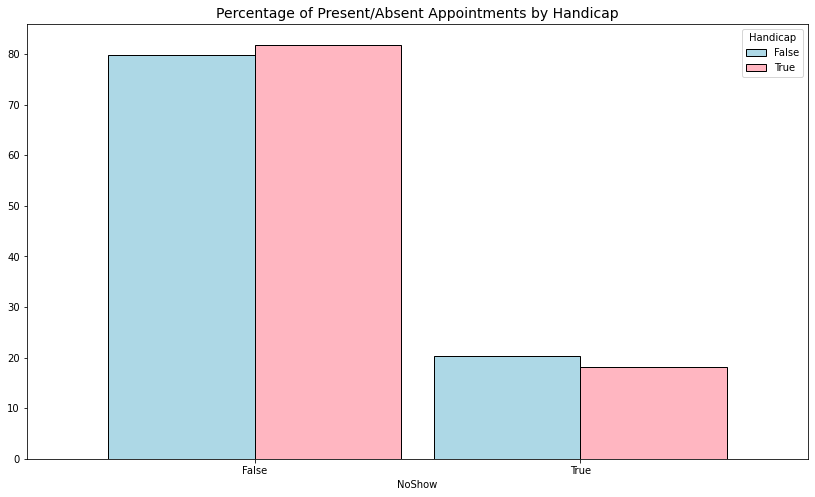

In [117]:
# Draw the chart
fig_24 = bar(pct_handicap)
bar_title(fig_24,'Handicap');

> From *Fig.24*, we can see that the patients WITHOUT handicap (**20.24%**) is more likely to absent for their medical appointments than the ones who are handicapped (**18.16%**).

> **Q5: How do other factors (scholarship, hypertension, diabetes, alcoholism, handicap) affect to the shown-up/no shown-up rate of the patients?**
>
> **Scholarship:** the patients WITHOUT scholarship is less likely to be absent for their medical appointments than the patients WITH scholarship. The percentage of no shown-up patients WITHOUT scholarship is **19.81%**, while that of the patients WITH scholarship is **23.74%**.
>
> **Hypertension:** the percentage of *absent* patients WITHOUT Hypertension (**20.90%**) is higher than that of WITH Hypertension (**17.30%**). Therefore, it can be said that the patients WITHOUT hypertension is more likely to be absent for their medical appointments than the patients WITH hypertension.
>
> **Diabetes:** the patients WITHOUT diabetes (**20.36%**) are more likely to be *absent* for their medical appointments than the ones WITH diabetes (**18.00%**).
>
> **Alcoholism:** the percentage of *absent* patients WITH and WITHOUT alcoholism are about the same, **20.15%** and **20.19%** respectively. Therefore, it can be said that Alcoholism does not affect to the absent rate of the patients.
>
> **Handicap:** the patients WITHOUT handicap (**20.24%**) is more likely to absent for their medical appointments than the ones who are handicapped (**18.16%**).

### Q6: Would sending SMS messages to the patients affect to the present/absent rate of the patients?

In [118]:
# Number of patients Received and Not Received SMS
sms = explore('SMSReceived')
sms

False    75044
True     35482
Name: SMSReceived, dtype: int64

### Fig.25: Percentage of Patients Received and NOT Received SMS

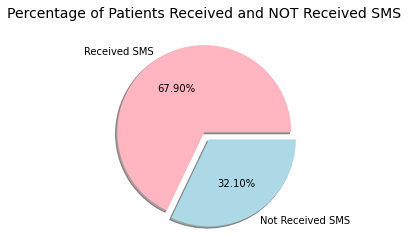

In [119]:
fig_25 = pie(sms, ['Received SMS', 'Not Received SMS'])
plt.title('Percentage of Patients Received and NOT Received SMS', fontsize=14);

> About **2/3** of the patients didn't received SMS for their medical appointments (**67.90%**), while the rest **32.10%** of the patients received one or more messages about their appointments.

In [120]:
pct_sms = unstack('SMSReceived', 'NoShow')
pct_sms

SMSReceived,False,True
NoShow,,
False,83.3,72.43
True,16.7,27.57


### Fig.26: Percentage of Present/ Absent Appoinments by SMS Received

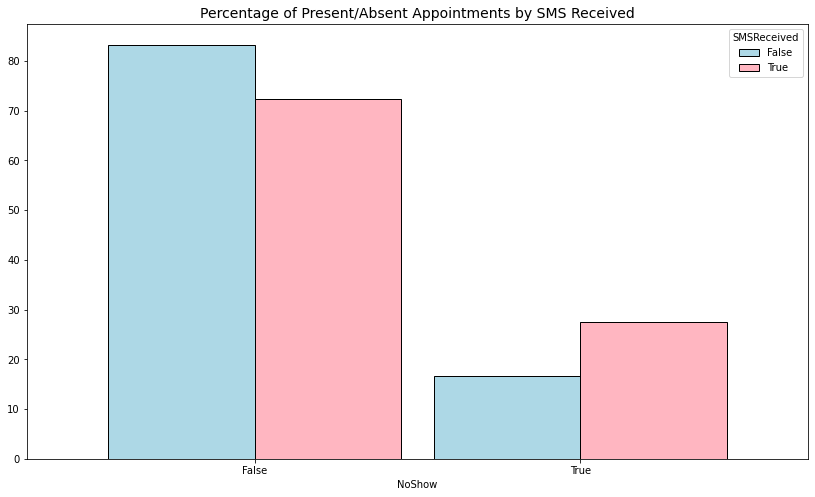

In [121]:
fig_26 = bar(pct_sms)
bar_title(fig_26, 'SMS Received');

> The patients who received SMS are more likely to be absent for their medical appointments (**27.57%**), while only **16.70%** of the patients who didn't received SMS absent for their appointments. Therefore, sending SMS to the patients does not seem to influence the patient's decision of being present/absent for their appointments.

<a id='conclusions'></a>

## Conclusions

Based on the analysis, these following factors would **influence** the decision to be *absent* of the patients:


> - **Waiting Duration:** The average waiting duration is **9.9** days, the minimum is **0** day ( the scheduled date and the actual appointment date happened at the same date), and the maximum waiting duration is **179** days. The number of appointments that were scheduled at the **same day** accounts for the highest percentage (**37.07%**), while the **11-15 days** of waiting duration accounts for the lowest percentage (**7.40%**) --> The longer the waiting duration between the scheduled date and appoinment date, the higher the percentage of absent appointments.
>
>
> - **Age:** More than half of the total number of appointments are from Adults (25-64 years) (**53.25%**). The second highest number of appointments (**21.04%**) are from Children patients (0-14 years), followed by Seniors (**13.03%**). Youth patients (15-24 years) account for the lowest number of appointments (**12.68%**). While **Adults** has the highest percentage of total appointments, **Adults** also has the highest percentage of *absent* appointments (**52.06%** of the total *absent* appointments). **Children** has the sencond highest percentage of *absent* appointments (**22.07%**), while only **10.00%** of **Seniors** are *absent* for their appointments.
>
>
> - **Neighbourhood:** *JARDIM CAMBURI* and *MARIA ORTIZ* are the two neighbourhoods that have the highest number of medical appointments. At the same time, these two neighbourhoods also have the highest numbers of *absent* appointments.
>
>
> - **Scholarship:** The majority of patients is WITHOUT scholarship (**90.17%**), while there is only **9.83%** of the total number of patients is WITH scholarship. The patients WITH scholarship is more likely to be *absent* for their medical appointments (**23.74%**), while that of the patients WITHOUT scholarship is **19.81%**.
>
>
> - **Hypertension:** The majority of patients doesn't have hypertension (**80.28%**), while only **19.72%** of the total number of patients have hypertension. The patients WITHOUT hypertension (**20.90%**) is more likely to be *absent* for their medical appointments than the patients WITH hypertension (**17.30%**).
>
>
> - **Diabetes:** In the total number of patients, **92.81%** of the patients is WITHOUT diabetes, while only **7.19%** of the patients has diabetes. The patients WITHOUT diabetes (**20.36%**) are more likely to be *absent* for their medical appointments than the ones WITH diabetes (**18.00%**).
>
>
> - **Handicap:** There is only a minority of patients are handicapped (**2.03%**). The rest of the patients are not handicapped (**97.97%**). The patients who are NOT handicapped (**20.24%**) is more likely to be *absent* for their medical appointments than the ones that are handicapped (**18.16%**).

These following factors would **not influence** the decision to be *absent* of the patients:
> - **Gender:** In general, **65.39%** of the absent appointments belongs to *Female* patients, while **35.61%** is of *Male* patients. However, Female has **almost double** the total amount of appointments booked (**71,840** appointments) compared to Male (**38,687** appointments). Since Female has more booked appointments than Male in general, therefore, that could be one reason why the numbers of absent appointments generated by Female is higher than that of Male patients. If we only consider the absent rate out of the total number of appointments each gender, then Female and Male have about the same absent rate, **20.31%** and **19.97%** respectively. --> I would conclude that *Gender* does NOT affect to the absent rate of the patients.
>
>
> - **Alcoholism:** The majority of patients (**96.96%**) is NOT addicted to alcohol, while only **3.04%** of patients is suffering WITH alcoholism. The percentage of *absent* patients WITH and WITHOUT alcoholism are about the same, **20.15%** and **20.19%** respectively. --> Alcoholism does not affect to the absent rate of the patients.
>
>
> - **SMS Received:** About **2/3** of the patients did NOT received SMS for their medical appointments (**67.90%**), while the rest **32.10%** of the patients received one or more messages about their appointments. The patients who received SMS are more likely to be *absent* for their medical appointments (**27.57%**), while only **16.70%** of the patients who didn't received SMS *absent* for their appointments. Therefore, sending SMS to the patients does not seem to influence the patient's decision of being present/absent for their appointments.
